In [1]:
from utils import load_novelAI,KDiffusionSampler,txt2img,img2img,FaceRestorerCodeFormer

In [2]:
checkpoint_file="./weights/models/latest.ckpt"
vae_file="./weights/models/latest.vae.pt"
face_restoration_file="./weights/facelib/codeformer.pth"
config="./config.yaml"

In [3]:
sd_model=load_novelAI(checkpoint_file,vae_file,config)

LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.18.self_attn.q_proj.bias', 'vision_model.encoder.layers.0.mlp.fc1.bias', 'vision_model.encoder.layers.15.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.self_attn.v_proj.weight', 'vision_model.encoder.layers.21.layer_norm1.weight', 'vision_model.encoder.layers.19.mlp.fc1.bias', 'vision_model.encoder.layers.4.self_attn.q_proj.bias', 'vision_model.encoder.layers.23.layer_norm2.weight', 'vision_model.encoder.layers.1.layer_norm1.bias', 'vision_model.encoder.layers.11.self_attn.out_proj.bias', 'vision_model.encoder.layers.22.mlp.fc1.weight', 'vision_model.encoder.layers.14.self_attn.k_proj.bias', 'vision_model.encoder.layers.16.self_attn.out_proj.weight', 'vision_model.encoder.layers.8.mlp.fc1.bias', 'vision_model.encoder.layers.20.self_attn.k_proj.weight', 'visio

Loading weights from ./weights/models/latest.ckpt
Loading VAE weights from: ./weights/models/latest.vae.pt


In [4]:
sampler=KDiffusionSampler("sample_euler_ancestral",sd_model)

In [5]:
face_restoration=FaceRestorerCodeFormer(face_restoration_file)

In [6]:
prompt="extremely detailed CG unity 8k wallpaper,black long hair,cute face,1 adlut girl,happy, green skirt dress, flower pattern in dress,solo,green gown,art of light novel,in field"
negative_prompt="lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"

  0%|          | 0/28 [00:00<?, ?it/s]

/home/ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


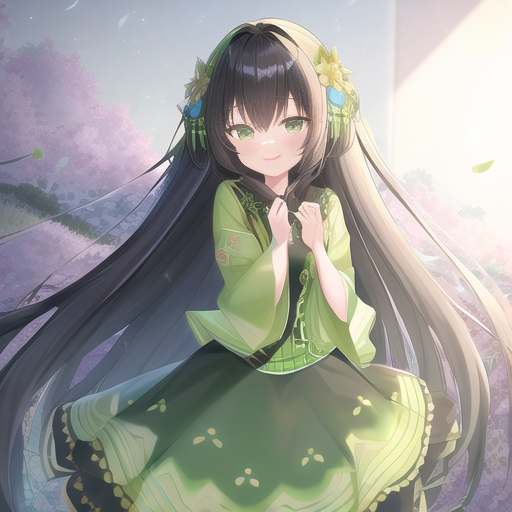

In [7]:
txt2img(sd_model,sampler,prompt,negative_prompt,face_restoration=face_restoration)